# Telco Customer Churn Data Exploration

This notebook provides an initial exploration of the Telco Customer Churn dataset, including data loading, summary statistics, visualizations, and missing value analysis.

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set_theme(style='whitegrid')
%matplotlib inline

In [2]:
# Load Dataset
df = pd.read_csv('../data/data.csv')
print(f"Dataset loaded with shape: {df.shape}")

Dataset loaded with shape: (7043, 21)


In [3]:
# View Basic Dataset Information
print('First 5 rows:')
display(df.head())
print(f"\nShape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


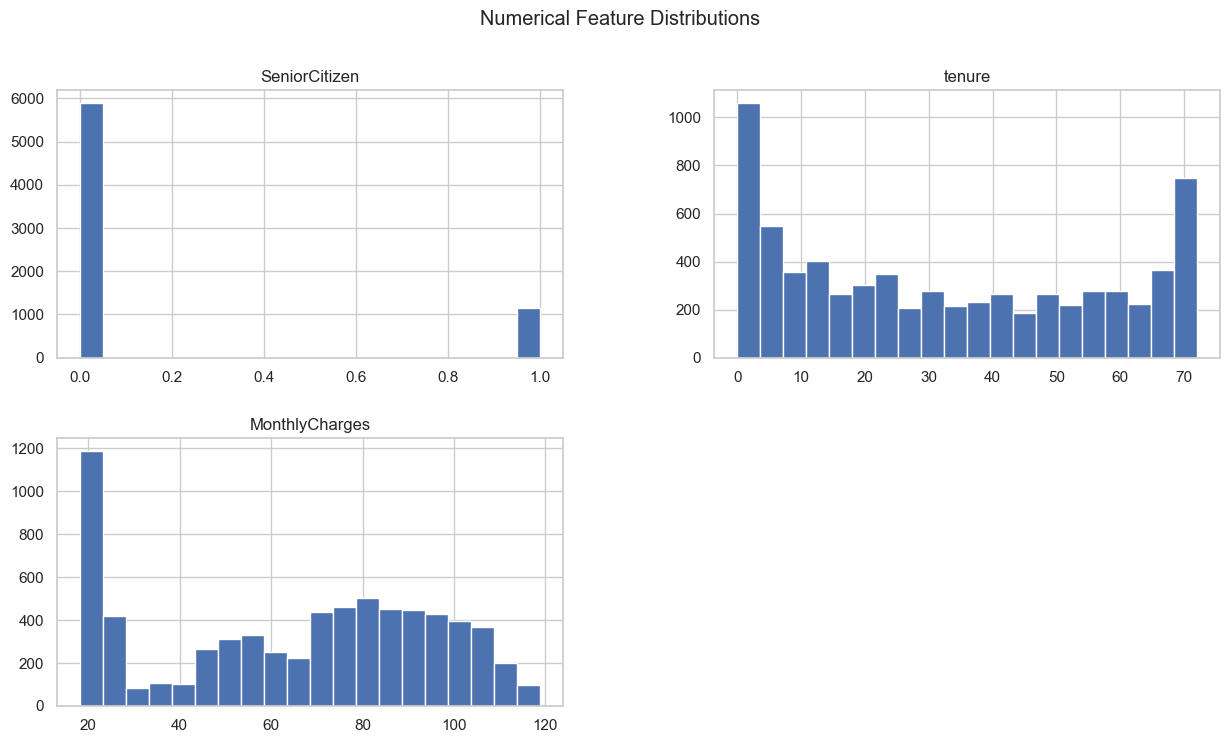

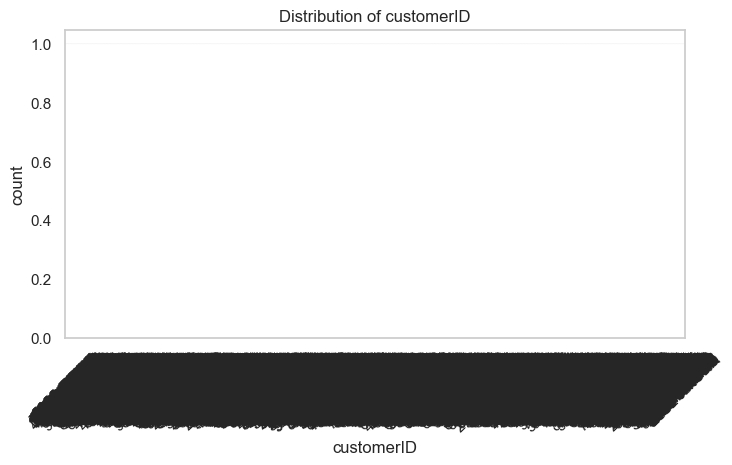

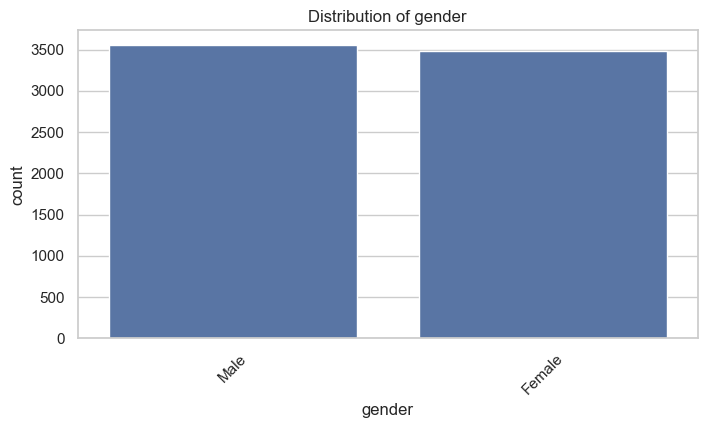

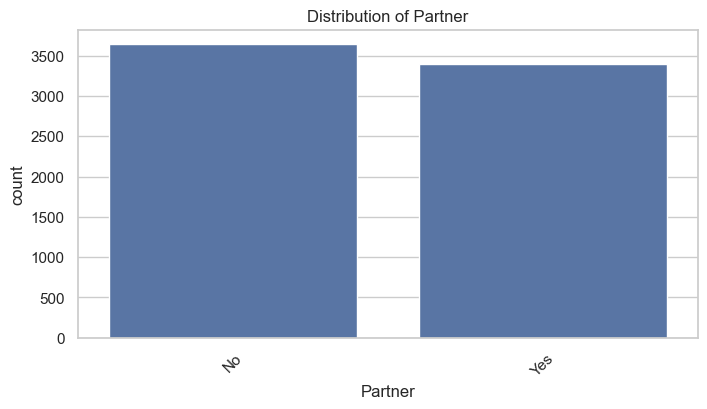

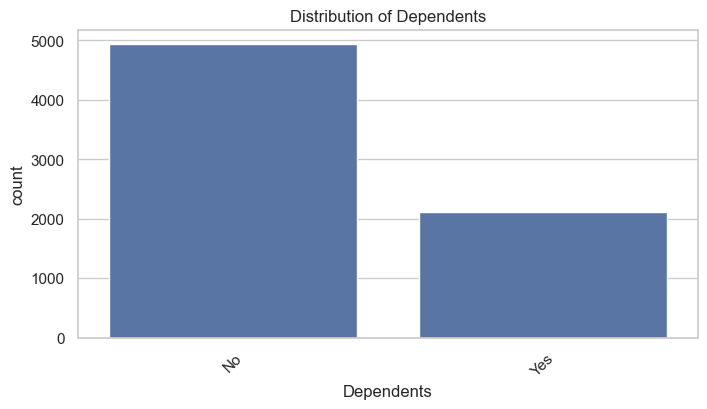

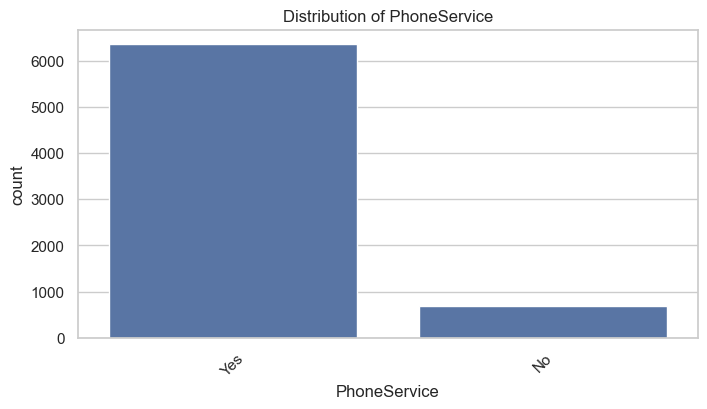

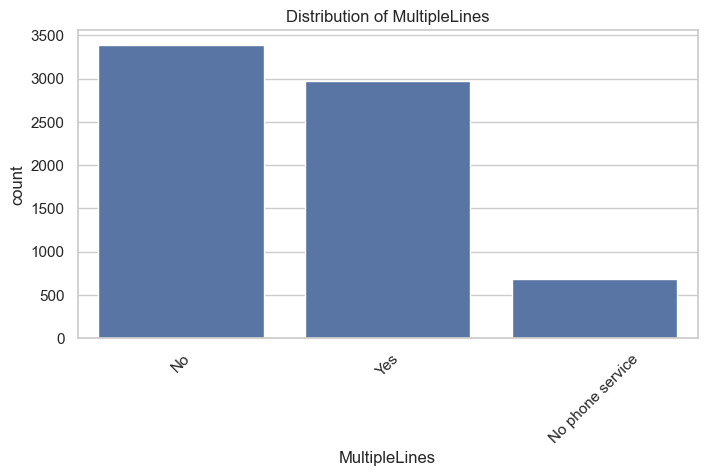

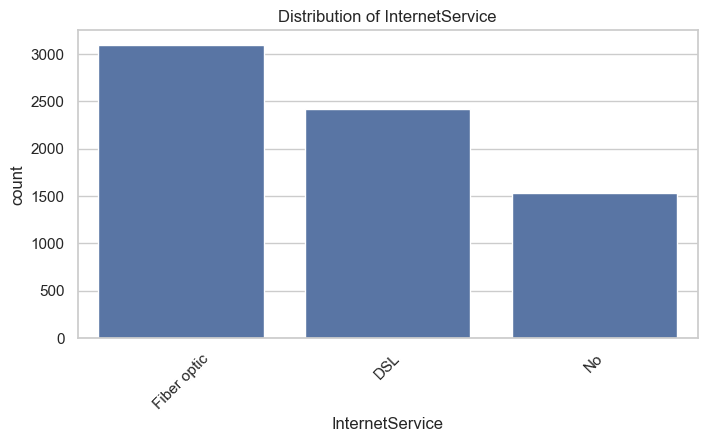

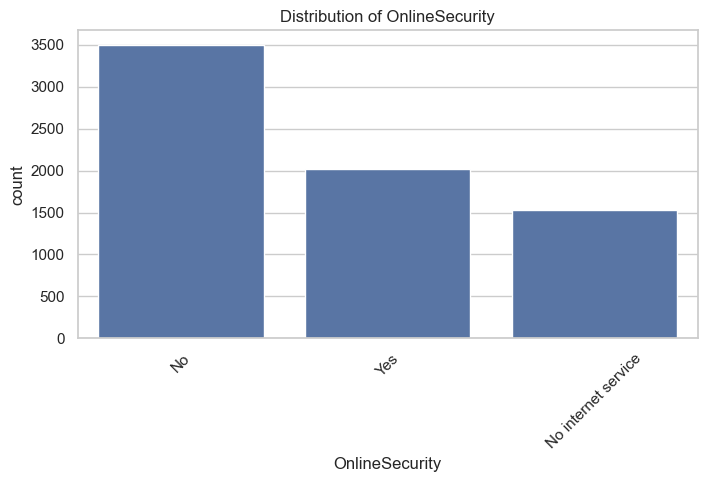

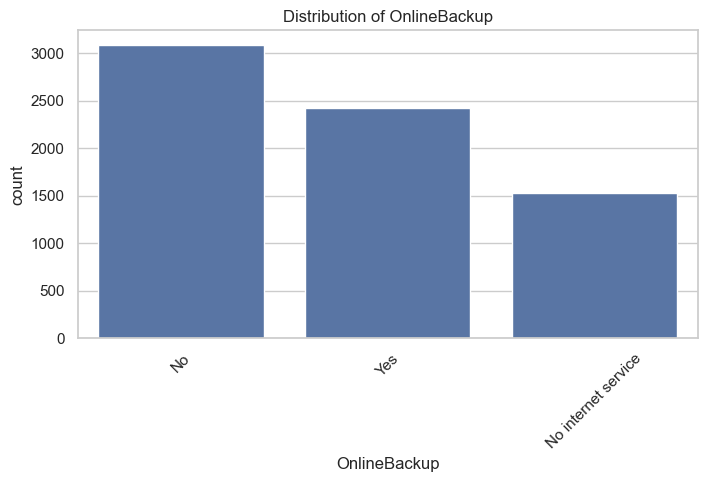

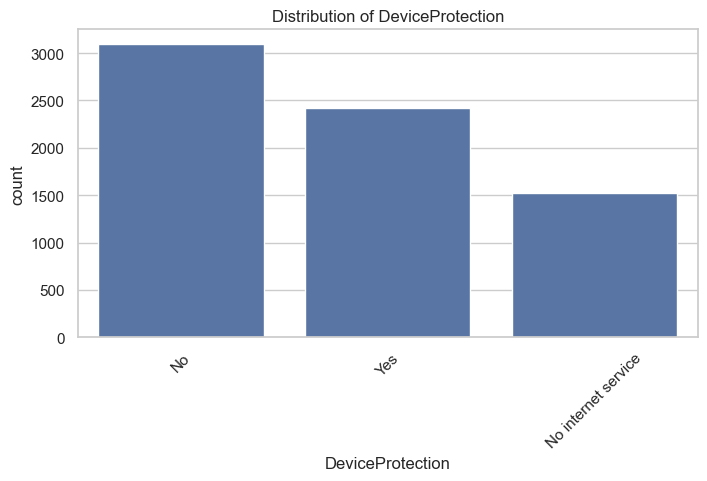

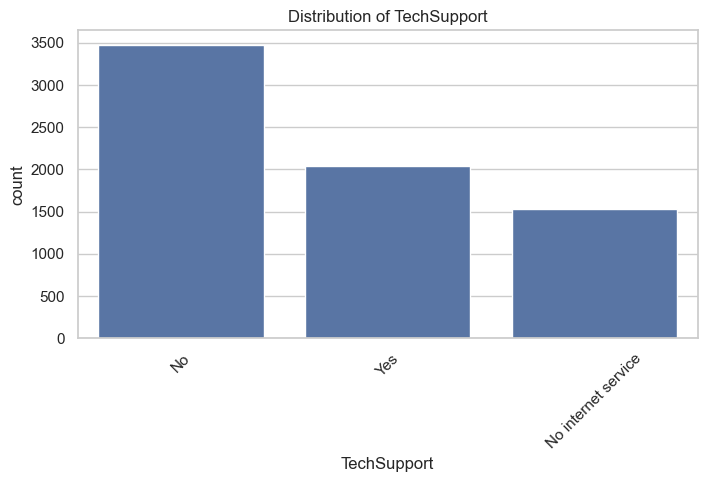

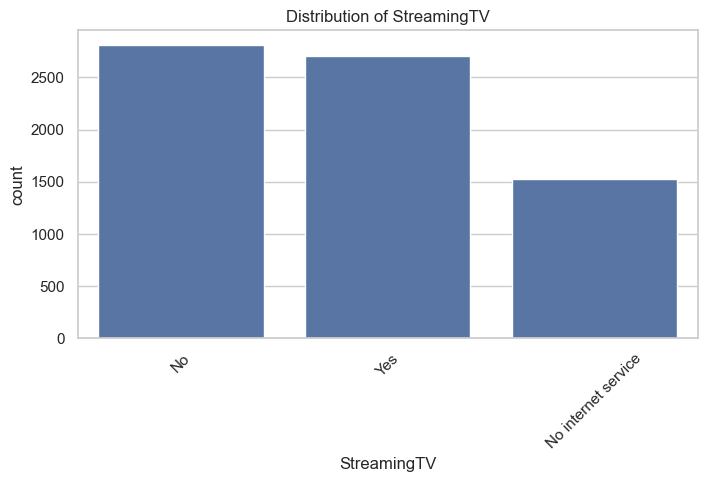

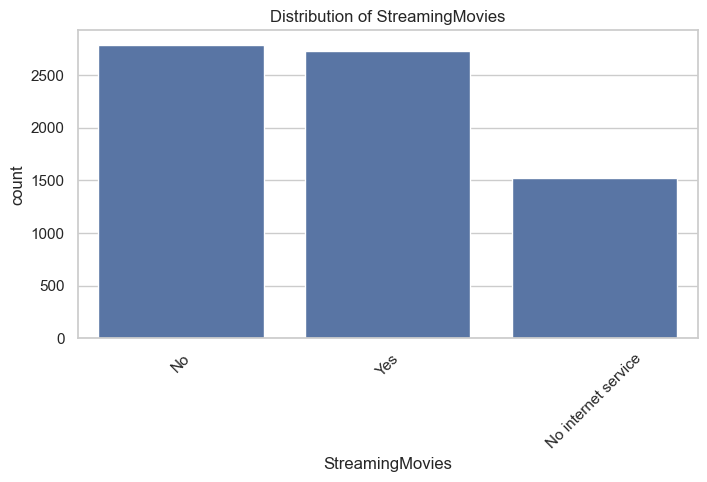

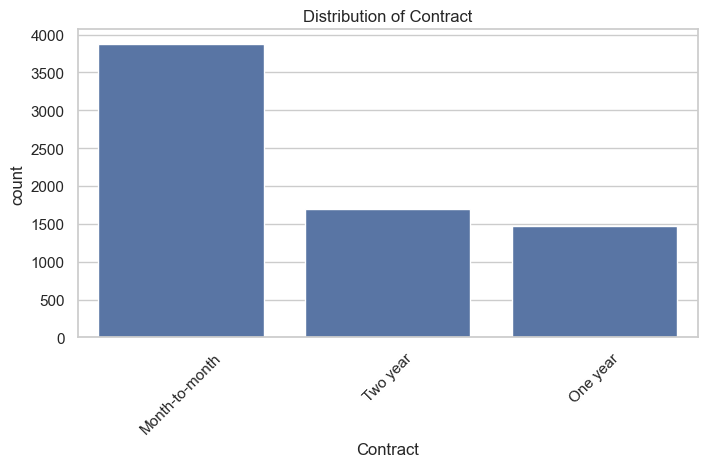

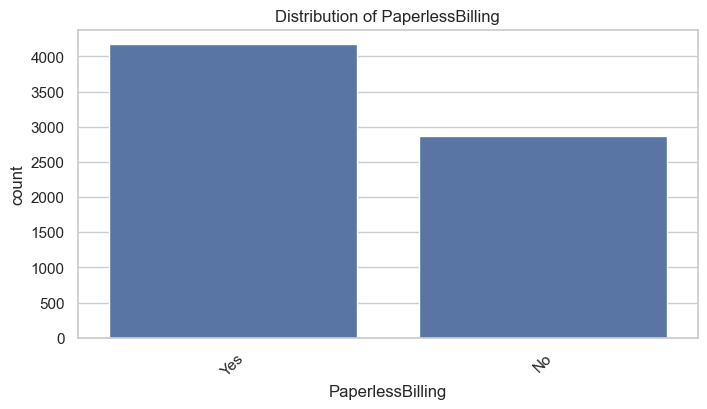

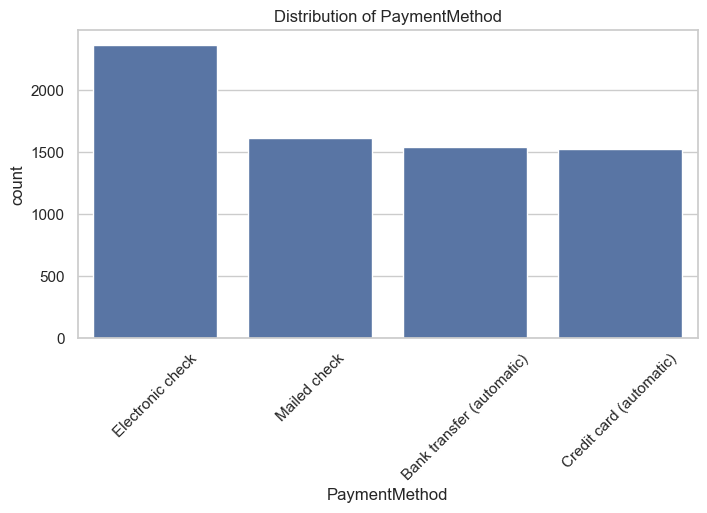

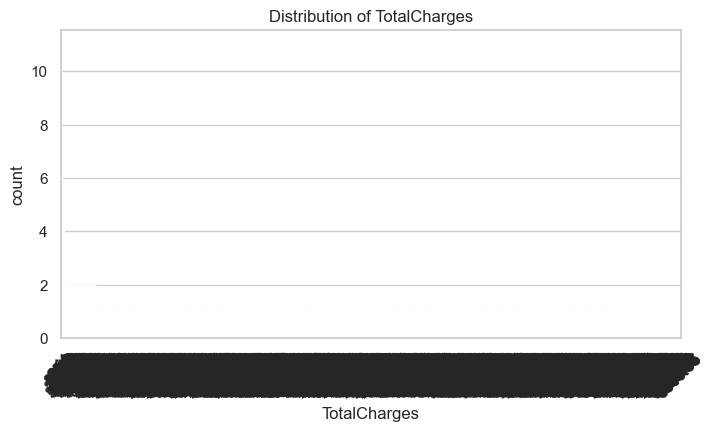

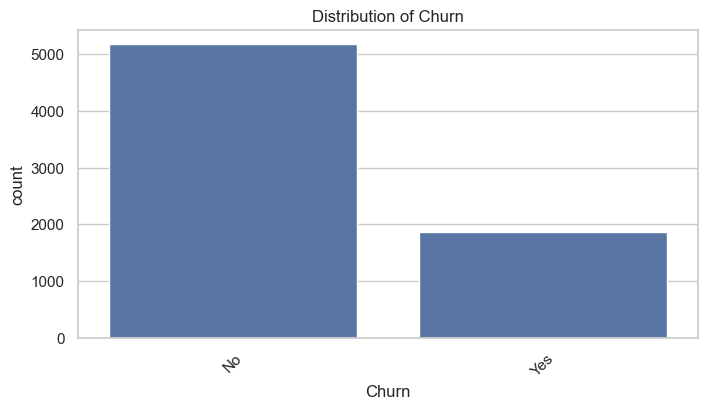

In [4]:
# Visualize Data Distributions
# Numerical features
num_cols = df.select_dtypes(include=[np.number]).columns
if len(num_cols) > 0:
    df[num_cols].hist(figsize=(15, 8), bins=20)
    plt.suptitle('Numerical Feature Distributions')
    plt.show()
else:
    print('No numerical columns found.')

# Categorical features
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [5]:
# Identify Missing Values
missing_counts = df.isnull().sum()
missing_perc = (missing_counts / len(df)) * 100
missing = missing_counts[missing_counts > 0]

if not missing.empty:
    plt.figure(figsize=(10, 4))
    missing.sort_values(ascending=False).plot(kind='bar')
    plt.title('Missing Values per Column')
    plt.ylabel('Count')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print('No missing values found.')

No missing values found.


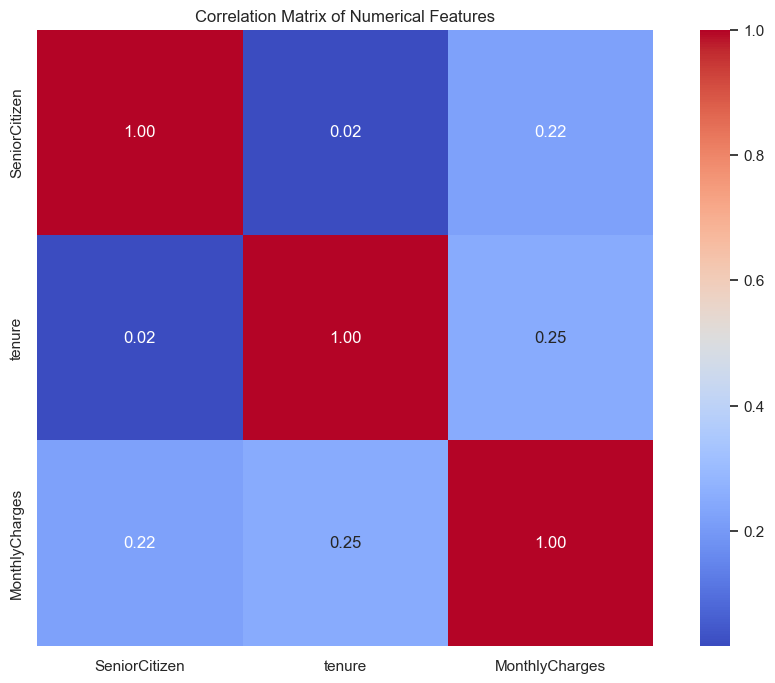

In [6]:
# Explore Correlations
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
else:
    print('Not enough numerical columns for correlation analysis.')